In [24]:
import time
import subprocess

COMMAND = "xdotool search --name 'World of Warcraft' windowactivate && sleep 0.1 && scrot -u 'testscrot.png'"

subprocess.run(COMMAND, shell=True)

CompletedProcess(args="xdotool search --name 'World of Warcraft' windowactivate && sleep 0.1 && scrot -u 'testscrot.png'", returncode=0)

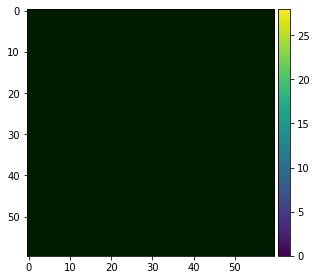

In [25]:
from skimage import io
# io.use_plugin('matplotlib', 'imread')
# screen = io.imread('testscrot.png').transpose((2, 0, 1))
screen = io.imread('testscrot_011.png')
_, screen_height, screen_width = screen.shape

relevant_screen = screen[:60,:60, :]
io.imshow(relevant_screen)
# image
# io.imshow(image)

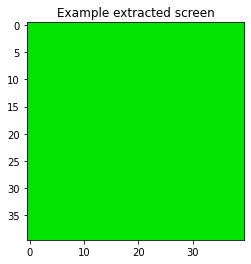

In [26]:
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

resize = T.Compose([T.ToPILImage(), T.Resize(40, interpolation=Image.CUBIC), T.ToTensor()])

screen = screen.transpose((2, 0, 1))
screen = screen[:, :60, :60]
screen = np.ascontiguousarray(screen, dtype=np.float32)
screen = torch.from_numpy(screen)
screen = resize(screen).unsqueeze(0)

plt.figure()
plt.imshow(screen.cpu().squeeze(0).permute(1, 2, 0).numpy(), interpolation='none')
plt.title('Example extracted screen')
plt.show()